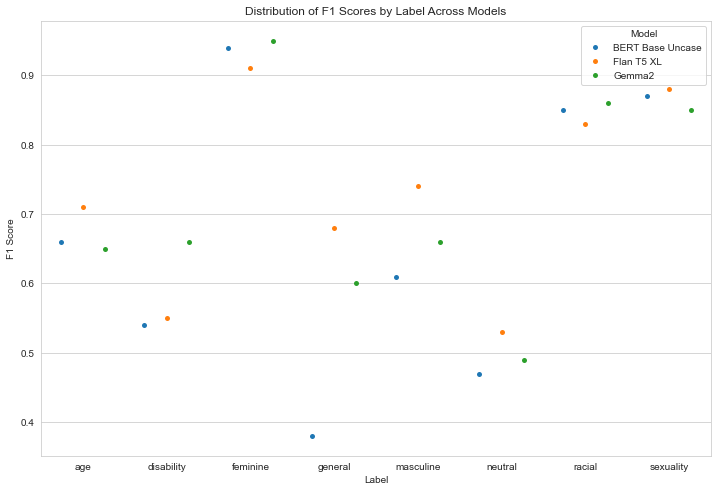

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for BERT Base Uncase
data_bert = {
    'Label': ['age', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality'],
    'Model': ['BERT Base Uncase'] * 8,
    'F1-Score': [0.66, 0.54, 0.94, 0.38, 0.61, 0.47, 0.85, 0.87]
}

# Data for Flan T5 XL
data_flan = {
    'Label': ['age', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality'],
    'Model': ['Flan T5 XL'] * 8,
    'F1-Score': [0.71, 0.55, 0.91, 0.68, 0.74, 0.53, 0.83, 0.88]
}

# Data for Gemma2
data_gemma = {
    'Label': ['age', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality'],
    'Model': ['Gemma2'] * 8,
    'F1-Score': [0.65, 0.66, 0.95, 0.60, 0.66, 0.49, 0.86, 0.85]
}

# Create DataFrames
df_bert = pd.DataFrame(data_bert)
df_flan = pd.DataFrame(data_flan)
df_gemma = pd.DataFrame(data_gemma)

# Combine DataFrames
df_all = pd.concat([df_bert, df_flan, df_gemma])

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a swarm plot
sns.swarmplot(x='Label', y='F1-Score', hue='Model', data=df_all, dodge=True)

# Set the title and labels
plt.title('Distribution of F1 Scores by Label Across Models')
plt.xlabel('Label')
plt.ylabel('F1 Score')

# Show the plot
plt.legend(title='Model')
plt.show()


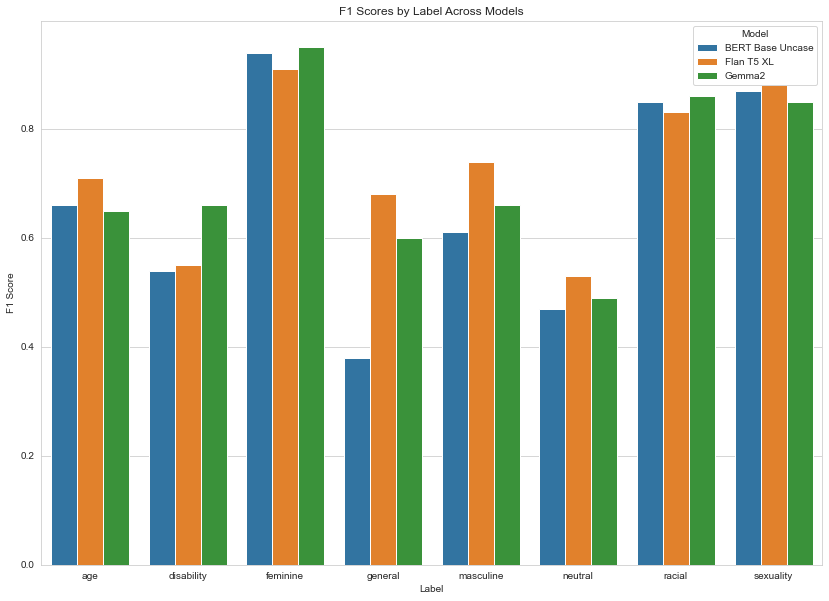

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for BERT Base Uncase
data_bert = {
    'Label': ['age', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality'],
    'Model': ['BERT Base Uncase'] * 8,
    'F1-Score': [0.66, 0.54, 0.94, 0.38, 0.61, 0.47, 0.85, 0.87]
}

# Data for Flan T5 XL
data_flan = {
    'Label': ['age', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality'],
    'Model': ['Flan T5 XL'] * 8,
    'F1-Score': [0.71, 0.55, 0.91, 0.68, 0.74, 0.53, 0.83, 0.88]
}

# Data for Gemma2
data_gemma = {
    'Label': ['age', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality'],
    'Model': ['Gemma2'] * 8,
    'F1-Score': [0.65, 0.66, 0.95, 0.60, 0.66, 0.49, 0.86, 0.85]
}

# Create DataFrames
df_bert = pd.DataFrame(data_bert)
df_flan = pd.DataFrame(data_flan)
df_gemma = pd.DataFrame(data_gemma)

# Combine DataFrames
df_all = pd.concat([df_bert, df_flan, df_gemma])

# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create a bar plot
sns.barplot(x='Label', y='F1-Score', hue='Model', data=df_all)

# Set the title and labels
plt.title('F1 Scores by Label Across Models')
plt.xlabel('Label')
plt.ylabel('F1 Score')

# Show the plot
plt.legend(title='Model')
plt.show()


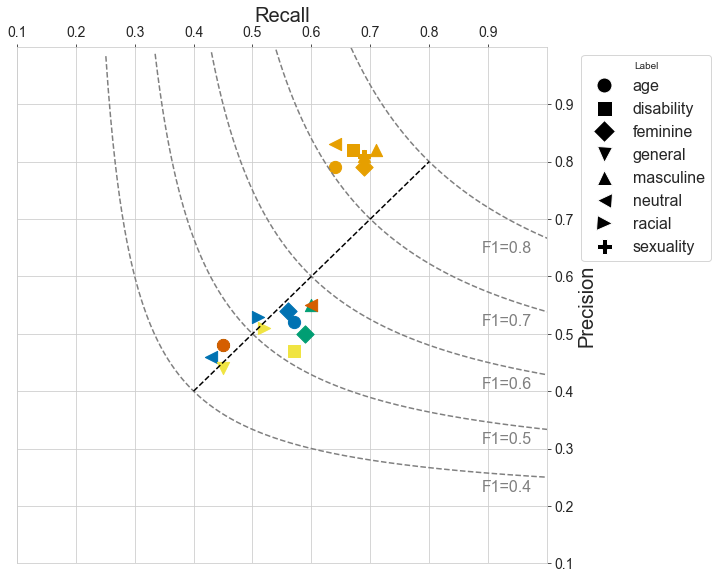

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the F1 score bands
f1_scores = [0.4, 0.5, 0.6, 0.7, 0.8]

fig, ax = plt.subplots(figsize=(9.5, 9.5))

ax.set_xlim(0.1, 1)
ax.set_ylim(0.1, 1)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('right')
ax.xaxis.set_label_position('top')
ax.yaxis.set_label_position('right')

# Plot each F1 score curve
for f1 in f1_scores:
    r = np.linspace(0.01, 2, 1000)  # Increased range and resolution for smoother curve
    with np.errstate(divide='ignore', invalid='ignore'):
        p = f1 * r / (2 * r - f1)
        # Filter out invalid points
        valid = (p >= 0) & (p <= 1) & (2 * r != f1)
        r_valid = r[valid]
        p_valid = p[valid]

    # Plot valid points
    ax.plot(r_valid, p_valid, linestyle='--', color='grey')
    # Annotate each curve
    if f1 / (2 - f1) <= 1:  # Ensure the annotation is within the plot range
        ax.text(0.975, f1 / (2 - f1) - 0.03, f'F1={f1}', horizontalalignment='right', verticalalignment='bottom',
                color='grey', fontsize=16)

# Add dashed diagonal line from bottom left to top right
ax.plot([min(f1_scores), max(f1_scores)], [min(f1_scores), max(f1_scores)], linestyle='--', color='black')

# Define some markers for the labels
markers = {
    "age": "o",
    "disability": "s",
    "feminine": "D",
    "general": "v",
    "masculine": "^",
    "neutral": "<",
    "racial": ">",
    "sexuality": "P"
}

# Define some colours for the experiment types
colors = {
    "FT": "#E69F00",   # Orange
    "pZS": "#0072B2",  # Blue
    "pFS": "#F0E442",  # Yellow
    "pCoT": "#009E73", # Green
    "pSC": "#D55E00"   # Red
}

# Data
model_family = ["BERT base", "BERT large", "RoBERTa base", "RoBERTa large", "Flan T5 XL", "Phi3 3.8B 4k", "GPT-4", 
                "Gemma2-9B", "Gemma2-9B", "Gemma2-9B", "Gemma2-9B", "Gemma2-9B", "Llama3-8B", "Llama3-8B", 
                "Llama3-8B", "Llama3-8B", "Llama3-8B", "Phi3-7B 8k", "Phi3-7B 8k", "Phi3-7B 8k", "Phi3-7B 8k", "Phi3-7B 8k"]
experiments = np.array(["FT", "FT", "FT", "FT", "FT", "FT", "pZS", "FT", "pZS", "pFS", "pCoT", "pSC", "FT", "pZS", 
                        "pFS", "pCoT", "pSC", "FT", "pZS", "pFS", "pCoT", "pSC"])
labels = ["age", "disability", "feminine", "general", "masculine", "neutral", "racial", "sexuality", "age", "disability", 
          "feminine", "general", "masculine", "neutral", "racial", "sexuality", "age", "disability", "feminine", "general", 
          "masculine", "neutral"]
recall = np.array([0.64, 0.67, 0.69, 0.01, 0.71, 0.64, 0.51, 0.69, 0.57, 0.57, 0.59, 0.01, 0.69, 0.43, 0.52, 0.45, 0.45, 
                   0.01, 0.56, 0.45, 0.60, 0.60])
precision = np.array([0.79, 0.82, 0.79, 0.01, 0.82, 0.83, 0.53, 0.81, 0.52, 0.47, 0.50, 0.01, 0.81, 0.46, 0.51, 0.48, 
                      0.48, 0.01, 0.54, 0.44, 0.55, 0.55])

# F1 on the fly
def f1(p, r):
    if p + r == 0:
        return 0
    return 2 * ((p * r) / (p + r))

# Plot the scatter points
for exp, label, prec, rec in zip(experiments, labels, precision, recall):
    sc = ax.scatter(rec, prec, color=colors[exp], marker=markers[label], s=150)

# Create custom legend for types
type_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[type_], markersize=15, label=type_)
               for type_ in colors]
plt.legend(handles=type_legend, title="Type", bbox_to_anchor=(-0.05, 1), loc='upper right', fontsize=16)

# Create custom legend for labels
label_legend = [plt.Line2D([0], [0], marker=markers[label], color='w', markerfacecolor='k', markersize=15, label=label)
                for label in markers]
plt.legend(handles=label_legend, title="Label", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

ax.set_xlabel('Recall', fontsize=20)
ax.set_ylabel('Precision', fontsize=20)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.xticks(np.arange(0.1, 1, 0.1))
plt.yticks(np.arange(0.1, 1, 0.1))

plt.show()
